# 导数和微分

做一个实验，定义$u=f(x)=3x^2-4x$,如下：

In [2]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

通过令x=1并让h接近0， 导数的定义中$\frac{f(x+h)-f(x)}{h}$的数值结果接近2。 虽然这个实验不是一个数学证明，但稍后会看到，当x=1时，导数u'是2。

In [3]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


注意，注释#@save是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中。 因此，以后无须重新定义就可以直接调用它们（例如，d2l.use_svg_display()）。

在下面，use_svg_display函数指定matplotlib软件包输出svg图表以获得更清晰的图像。
```python
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')
```

我们定义set_figsize函数来设置图表大小。 注意，这里可以直接使用d2l.plt，因为导入语句 from matplotlib import pyplot as plt已标记为保存到d2l包中。
```python
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
```

下面的set_axes函数用于设置由matplotlib生成图表的轴的属性。
```python
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
```

通过这三个用于图形配置的函数，定义一个plot函数来简洁地绘制多条曲线， 因为我们需要在整个书中可视化许多曲线。
```python
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
```

In [4]:
#@save
def use_svg_display():
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

#@save
def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, 
         xlim=None, ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以绘制函数u=f(x)及其在x=1处的切线y=2x-3， 其中系数2是切线的斜率。

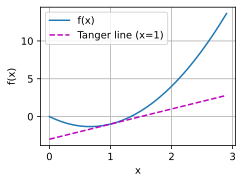

In [5]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tanger line (x=1)'])

# 练习

1. 绘制函数$(y = f(x) = x^3 - \frac{1}{x})$和其在$(x = 1)$处切线的图像。

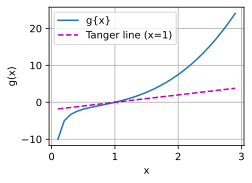

In [7]:
def g(x):
    return x ** 3 - 1 / x

x = np.arange(0.1, 3, 0.1)
plot(x, [g(x), 2 * x - 2], 'x', 'g(x)', legend=['g{x}', 'Tanger line (x=1)'])

2. 求函数$(f(\mathbf{x}) = 3x_1^2 + 5e^{x_2})$的梯度。

In [ ]:
def h(x1, x2):
    return 3 * x1 ** 2 + 5 * np.exp(x2)

def grad_h(x1, x2):
    return 6 * x1, 5 * np.exp(x2)

3. 函数$(f(\mathbf{x}) = \|\mathbf{x}\|_2)$的梯度是什么？

$$
-\frac{2sum(x)}{\|x\|_2}
$$

4. 尝试写出函数$u = f(x, y, z)$，其中$x = x(a, b)，y = y(a, b)，z = z(a, b)$的链式法则。

参考：
![多元函数求导的链式法则](./img/多元函数求导的链式法则.png)

$$
\frac{\partial{u}}{\partial{a}}=\frac{\partial{u}}{\partial{x}}\frac{\partial{x}}{\partial{a}}+\frac{\partial{u}}{\partial{y}}\frac{\partial{y}}{\partial{a}}+\frac{\partial{u}}{\partial{z}}\frac{\partial{z}}{\partial{a}}
$$

$$
\frac{\partial{u}}{\partial{b}}=\frac{\partial{u}}{\partial{x}}\frac{\partial{x}}{\partial{b}}+\frac{\partial{u}}{\partial{y}}\frac{\partial{y}}{\partial{b}}+\frac{\partial{u}}{\partial{z}}\frac{\partial{z}}{\partial{b}}
$$